# INTRODUCTION TO VISUALIZATION TOOLS

## MATPLOTLIB ARCHITECTURE
1. Backend Layer<br>
1.1. Figure Canvas: matplotlib.backend_bases.FigureCanvas<br>
     Encompasses the area on which the figure is drawn.<br>
1.2. Renderer: matplotlib.backend_bases.Renderer<br>
     Knows how to draw on the FigureCanvas.<br>
1.3. Event: matplotlib.back<br>
     Handles user inputs such as keyboard strokes and mouse clicks.<br>
      
2. Artist Layer<br>
2.1. Primitive: Line 2D, Rectangle, Circle and Text<br>
2.2. Composite: axis, tick, axes and figure

## HISTOGRAM PLOT
**Complete form**

In [20]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import matplotlib as mpl

fig = Figure()
Canvas = FigureCanvas(fig)

## Generate 10000 random numbers
import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111) ## Create and axes artist
ax.hist(x, 100) ## Generate a histogram of the 1000 numbers

## Add a title of the figure and save it
ax.set_title("Normal distribution whit $\mu = 0, \sigma = 1$")
fig.savefig("matplotlib_histogram_1.png")

**Easy form**

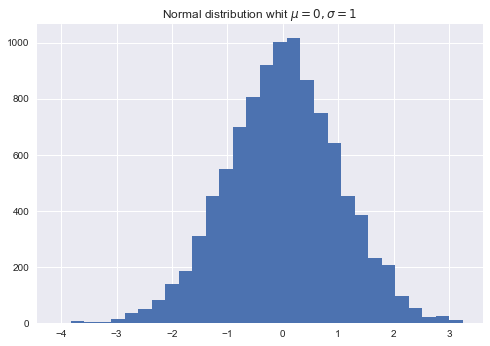

In [23]:
import matplotlib.pyplot as plt

## Style of the plot
mpl.style.use(['seaborn'])

y = np.random.randn(10000)
plt.hist(y, 30)
plt.title(r"Normal distribution whit $\mu = 0, \sigma = 1$")
plt.savefig("matplotlib_histogram_2.png")
plt.show()

## GRAPH DATAFRAME

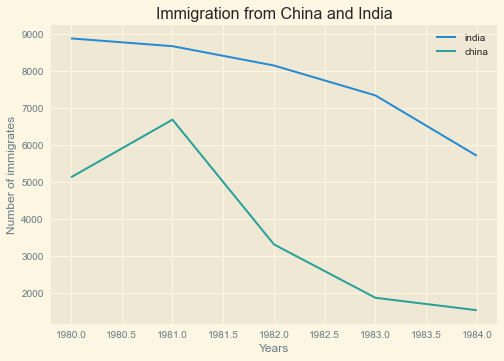

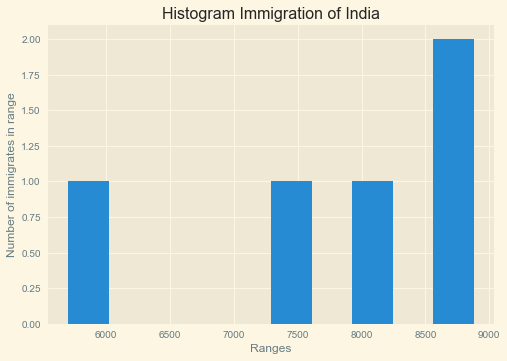

In [22]:
import pandas as pd

## Style of the plot
mpl.style.use(['Solarize_Light2'])

data = [[8880, 5123], [8670, 6682], [8147, 3308], [7338, 1863], [5704, 1527]]
df = pd.DataFrame(data, columns = ["india", "china"], index = [1980, 1981, 1982, 1983, 1984])

df.plot(kind="line")
plt.title("Immigration from China and India")
plt.xlabel("Years")
plt.ylabel("Number of immigrates")
plt.show()

df["india"].plot(kind="hist")
plt.title("Histogram Immigration of India")
plt.xlabel("Ranges")
plt.ylabel("Number of immigrates in range")
plt.show()

## DATAFRAME

**Read DataFrame**

In [5]:
## Paths of the file of data analysis
url = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx"
path = "C:\\Users\\USUARIO1\\Desktop\\MyPython\\Análisis de datos\\Visualization\\Canada.xlsx"

## Read the file either through url or direction file
df = pd.read_excel(url, sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**Make changes to de data set**

In [6]:
## Remove columns that we don't consider important
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
## Rename columns whit a more specific name
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
## Use countries as name of columns
df.set_index('Country', inplace=True)
## Convert all the values of the columns to string
df.columns = list(map(str, df.columns))
## Add column whit the sum of migrations values
df['Total'] = df.sum(axis = 1)

df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## LINE PLOTS

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

**Styles of Matplotlib**

In [8]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [13]:
## Selection style
mpl.style.use(['ggplot'])

**Line Plot inmigration Haiti**

In [10]:
years = list(map(str, range(1980, 2014)))

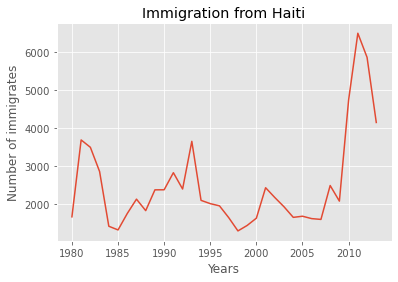

In [11]:
df_haiti = df.loc['Haiti', years]
df_haiti.plot(kind="line")
plt.title("Immigration from Haiti")
plt.xlabel("Years")
plt.ylabel("Number of immigrates")
plt.show()

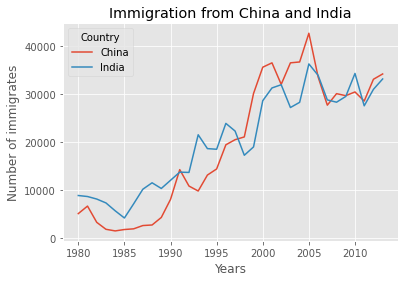

In [12]:
df_ci = df.loc[['China', 'India'], years]
df_ci = df_ci[years].transpose()
df_ci.plot(kind="line")
plt.title("Immigration from China and India")
plt.xlabel("Years")
plt.ylabel("Number of immigrates")
plt.show()